In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

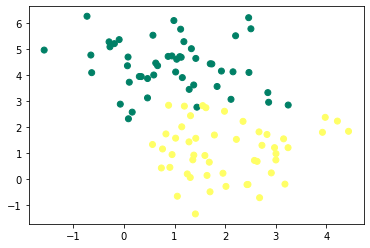

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

In [3]:
# INITIALISATION
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
W, b = initialisation(X)

In [5]:
# MODEL
def model(X, W, b):
    # Calculer le vecteur Z
    Z = X.dot(W) + b # Z = X.W + b
    A = 1 / (1 + np.exp(-Z)) # A = 1/(1+e^-z) (Fonction Sigmoide)
    return A

In [6]:
A = model(X, W, b)
A.shape

(100, 1)

In [7]:
# FUNCTION COUT
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [8]:
log_loss(A, y)

0.7223433006638724

In [9]:
# DESCENTE DE GRADIENT
def gradients(A, X, y):
    # derivee de L % a W
    dW = 1 / len(y) * np.dot(X.T, (A-y))
    db = 1 / len(y) * np.sum(A-y)
    return (dW, db)

In [10]:
dW, db = gradients(A, X, y)
dW

array([[-0.57622788],
       [ 0.26891699]])

In [11]:
# MIS A JOUR
## learning_rate = pas de mis a jour
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [12]:
W_, b_ = update(dW, db, W, b, 1)
W_

array([[ 0.32500133],
       [-0.41450726]])

In [30]:
# PREDICTION
def predict(X, W, b):
    # Activation
    A = model(X, W, b)
    print(A) # LA PROBABILITE D'APPERTENIR A CLASSE 1
    return A >= 0.5

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
# RASSEMBLEMENT
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    # initialisation W et b
    W, b = initialisation(X)
    Loss = [] # pour verifier l'apprentissage
    # boucle d'apprentissage
    for i in range(n_iter):
        # COUT
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        # GRADIENTS
        dW, db = gradients(A, X, y)
        # MIS A JOUR
        W, b = update(dW, db, W, b, learning_rate)
        
    # prediction
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
        
    plt.plot(Loss) # L'evolution des erreurs effectuees par le model
    plt.show()
    
    return (W, b) # Parametre que le model a apris

0.92


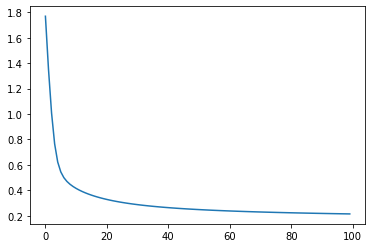

In [16]:
W, b = artificial_neuron(X, y)

In [17]:
W,b

(array([[ 0.96117184],
        [-1.10152378]]),
 array([1.14206077]))

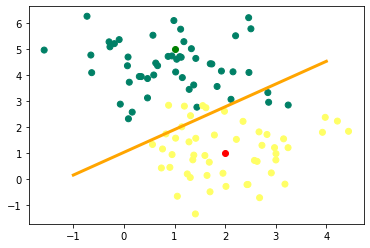

In [33]:
# Creer nouveau
new_plant_t = np.array([2, 1])
new_plant_nt = np.array([1, 5])

# Frontiere de decision
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

# DATASET
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
# PLANT 1
plt.scatter(new_plant_t[0], new_plant_t[1], c='r')
# PLANT 2
plt.scatter(new_plant_nt[0], new_plant_nt[1], c='g')
# FRONTIERE DE DECISION
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

In [31]:
# 92% => il y a 8 plants FP

predict(new_plant_t, W, b) # TOXIQUE (CLASSE 1)

[0.87684437]


array([ True])

In [32]:
predict(new_plant_nt, W, b) # NON TOXIQUE (CLASSE 0)

[0.03215866]


array([False])